In [1]:
#Name: Leonard Nkholise 
#date: 28 December 2021
#datasource link: https://royalsocietypublishing.org/doi/10.1098/rspb.2018.2400

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from matplotlib.colors import ListedColormap

# 2.0 Data Reading & Handling 

## 2.1 Read and assign filtered .csv data into program 

Longipes were regarded as desirable primary examples for this section and thus were added and used through out the procedure. Longipes can be interchanged with americana and pulchella species as they all posses distinctions of both male and female in their recorded data unlike other species.

In [3]:
c_data = pd.read_csv("Allometry_all microvelia species.csv")

In [4]:
c_data[c_data["Species"]=="longipes"]

,Individuals,Species,Sexe,wing_morph,Total leg length 3,body length
42,66,longipes,M,wingless,5877.653000,1955.072000
43,68,longipes,M,wingless,5225.772000,1895.612000
44,69,longipes,M,wingless,5840.742000,1960.864000
45,70,longipes,M,wingless,6012.491000,1964.802000
46,71,longipes,M,wingless,7451.682000,2089.121000
...,...,...,...,...,...,...
268,129,longipes,F,wingless,2662.044374,2080.895224
269,130,longipes,F,wingless,2706.456149,2113.664610
270,131,longipes,F,wingless,3053.442015,2262.229024
271,132,longipes,F,wingless,2697.001779,2109.554107


In [5]:
#can change to "americana"/"pulchella" Species
c_data=c_data[c_data["Species"]=="longipes"] 
x_data = c_data.iloc[:,[4,5]].values
y_data = c_data.loc[:,"Sexe"].values
x_data.shape

(121, 2)

## 2.2 Label encoding for male and female variants of species

In [6]:
#Label encoding for male and female
lab_enc=preprocessing.LabelEncoder()
y_data = lab_enc.fit_transform(y_data).reshape(-1,1)
y_data.shape

(121, 1)

## 2.3 Data splitting and Logistic regression training on data

In [7]:
#splitting data into training and test sets
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data, test_size = 0.43, random_state=0)

In [8]:
#Feature scaling for total leg length and body length to avoid data skewing in one scale over the other 
sc = preprocessing.StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### 2.3.4 Fitting Logistic regression on training data

In [9]:
from sklearn.linear_model import LogisticRegression
regress = LogisticRegression(solver='lbfgs',random_state=0)
regress.fit(x_train,y_train)

C:\Users\Leonard\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0)

### 2.3.4 Test set result precidtion accuracy of Logistic regression

In [10]:
y_predict = regress.predict(x_test)
y_predict
print('\nAccuracy:{:.2f}'.format(regress.score(x_test,y_test)))


Accuracy:1.00


In [11]:
#training set result visualization
x1,x2=np.meshgrid(np.arange(start = x_train[:,0].min()-1, stop = x_train[:,0].max()+1, step=0.01),np.arange(start = x_train[:,1].min()-1,stop = x_train[:,1].max()+1,step=0.01))
z=regress.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape)
c_map = ListedColormap(("pink","skyblue"))

## 2.4 Data analysis of logistic regression model

In this section, 0 and 1 labels both indicate genders, female and male respectively, the logistic model was used to seperate genders and establish possible boundries for each domain.In doing so, illustrating the "inter-species variation in the degree of sexual dimorphism within the Microvelia genus" discussed by William Toubiana and Abderrahman Khila at ease.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


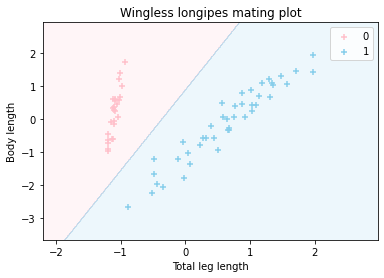

In [12]:
plt.contourf(x1,x2,z,alpha=0.15, cmap =c_map)

for idx, cl in enumerate(np.unique(y_train)):
 plt.scatter(x=x_train[y_train.ravel() == cl, 0], y=x_train[y_train.ravel() == cl, 1],
 alpha=1,
 marker="+", label=cl , c = c_map(idx))

plt.xlabel("Total leg length")
plt.ylabel("Body length")
plt.title("Wingless longipes mating plot")
#legend with 0 as female and 1 as male
plt.legend()